In [165]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import ast

# Data Read And Control

In [166]:
df = pd.read_csv(r"C:\Users\ibrah\Datasets\bumble_analysis/bumble_google_play_reviews.csv")


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              398 non-null    object
 1   userName              398 non-null    object
 2   userImage             398 non-null    object
 3   content               398 non-null    object
 4   score                 398 non-null    int64 
 5   thumbsUpCount         398 non-null    int64 
 6   reviewCreatedVersion  313 non-null    object
 7   at                    398 non-null    object
 8   replyContent          392 non-null    object
 9   repliedAt             392 non-null    object
 10  appVersion            313 non-null    object
dtypes: int64(2), object(9)
memory usage: 34.3+ KB


In [168]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
score,398.0,2.005025,1.561493,1.0,1.0,1.0,3.0,5.0
thumbsUpCount,398.0,2.273869,10.255569,0.0,0.0,1.0,2.0,122.0


In [169]:
df[df["userName"].duplicated()]

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
279,35599cd8-945e-484a-a157-842b06d08b74,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,So muchbertt,5,0,5.361.0,2024-03-20 06:05:57,It's great to hear that you're buzzin' in the ...,2024-03-20 13:21:13,5.361.0


In [170]:
df[df["userName"]=="A Google user"]

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
132,30dbff9f-e63e-4ae8-851c-e427d9d0862a,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Not sure if it's working or not. Been on it no...,1,3,5.271.1,2024-03-22 04:59:57,"This definitely doesn't sound right, and we're...",2024-03-23 15:00:53,5.271.1
279,35599cd8-945e-484a-a157-842b06d08b74,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,So muchbertt,5,0,5.361.0,2024-03-20 06:05:57,It's great to hear that you're buzzin' in the ...,2024-03-20 13:21:13,5.361.0


In [171]:
df.at[132, "userName"] = "A Google user 1"
df.at[279, "userName"] = "A Google user 2"

### Duplicate Control

In [172]:
df[df["userName"].duplicated()]

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion


In [173]:
df[df["userName"]=="A Google user"]

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion


In [174]:
df.loc[279]


reviewId                             35599cd8-945e-484a-a157-842b06d08b74
userName                                                  A Google user 2
userImage               https://play-lh.googleusercontent.com/EGemoI2N...
content                                                      So muchbertt
score                                                                   5
thumbsUpCount                                                           0
reviewCreatedVersion                                              5.361.0
at                                                    2024-03-20 06:05:57
replyContent            It's great to hear that you're buzzin' in the ...
repliedAt                                             2024-03-20 13:21:13
appVersion                                                        5.361.0
Name: 279, dtype: object

In [175]:
df[df["userName"].map(df["userName"].value_counts()) == 1]

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,448d0eba-b9a9-4267-9c56-68595a7492de,Ukiyu Yuuki,https://play-lh.googleusercontent.com/a/ACg8oc...,Censura??,1,0,NaN,2024-03-24 00:42:30,NaN,NaN,NaN
1,bd073467-5fef-46e3-8443-5480cd875320,Lucifer Ceallach,https://play-lh.googleusercontent.com/a-/ALV-U...,Can't stress enough how much I hate dating sit...,3,0,NaN,2024-03-24 00:29:53,"This definitely doesn't sound right, and we're...",2024-03-24 10:15:53,NaN
2,588707f8-a70d-4e5b-a60c-0d0301307591,Milan Kasta,https://play-lh.googleusercontent.com/a-/ALV-U...,Not even a single match ever after buying unli...,1,0,5.361.0,2024-03-24 00:12:34,We're sorry to hear about your negative experi...,2024-03-24 10:16:23,5.361.0
3,50a698e4-f999-4a8b-9f63-a381d1e00ba1,Lisa “LISSA” D,https://play-lh.googleusercontent.com/a-/ALV-U...,"Terrible!! Constant reminders that ""you're rak...",1,0,5.362.0,2024-03-23 23:58:10,"This definitely doesn't sound right, and we're...",2024-03-24 10:16:52,5.362.0
4,94680aa1-fa58-4120-a3e5-309dd4efc9cc,Rafael John Espanola,https://play-lh.googleusercontent.com/a-/ALV-U...,All people who are interested in you will just...,3,0,5.362.0,2024-03-23 23:56:02,"This definitely doesn't sound right, and we're...",2024-03-24 07:04:54,5.362.0
...,...,...,...,...,...,...,...,...,...,...,...
393,f9d39f8f-a121-4659-acc5-818d7941ba1f,Uday Chandran,https://play-lh.googleusercontent.com/a-/ALV-U...,Looks great for me..,5,0,5.361.0,2024-03-18 14:58:09,Thanks. 💛 It's so great to know that you're en...,2024-03-19 03:57:05,5.361.0
394,74962892-e317-40d1-bb51-61b14bd69885,Sony George,https://play-lh.googleusercontent.com/a-/ALV-U...,They will play mind games and will make you pa...,1,4,5.362.0,2024-03-18 14:55:49,We want to take a look at this. Please message...,2024-03-19 07:34:35,5.362.0
395,48aa1f6e-8c81-4152-993c-5dbf9158e4a0,Sharleen Huang,https://play-lh.googleusercontent.com/a-/ALV-U...,VERY BAD APP!! i used to had 2 account.. 1 per...,1,2,5.361.0,2024-03-18 14:47:44,We investigate all reports thoroughly and make...,2024-03-19 03:41:05,5.361.0
396,faba4c85-cbc0-41f2-a8bb-33e08bc42596,Pratham Patade,https://play-lh.googleusercontent.com/a-/ALV-U...,ye kya bawasir banaye hoo,1,1,NaN,2024-03-18 14:28:18,NaN,NaN,NaN


 # Columns organization

In [176]:
df1=df.copy()

In [177]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              398 non-null    object
 1   userName              398 non-null    object
 2   userImage             398 non-null    object
 3   content               398 non-null    object
 4   score                 398 non-null    int64 
 5   thumbsUpCount         398 non-null    int64 
 6   reviewCreatedVersion  313 non-null    object
 7   at                    398 non-null    object
 8   replyContent          392 non-null    object
 9   repliedAt             392 non-null    object
 10  appVersion            313 non-null    object
dtypes: int64(2), object(9)
memory usage: 34.3+ KB


In [178]:
df1=df1.drop(columns=["reviewId","userImage"])

In [179]:
df1

,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,Ukiyu Yuuki,Censura??,1,0,NaN,2024-03-24 00:42:30,NaN,NaN,NaN
1,Lucifer Ceallach,Can't stress enough how much I hate dating sit...,3,0,NaN,2024-03-24 00:29:53,"This definitely doesn't sound right, and we're...",2024-03-24 10:15:53,NaN
2,Milan Kasta,Not even a single match ever after buying unli...,1,0,5.361.0,2024-03-24 00:12:34,We're sorry to hear about your negative experi...,2024-03-24 10:16:23,5.361.0
3,Lisa “LISSA” D,"Terrible!! Constant reminders that ""you're rak...",1,0,5.362.0,2024-03-23 23:58:10,"This definitely doesn't sound right, and we're...",2024-03-24 10:16:52,5.362.0
4,Rafael John Espanola,All people who are interested in you will just...,3,0,5.362.0,2024-03-23 23:56:02,"This definitely doesn't sound right, and we're...",2024-03-24 07:04:54,5.362.0
...,...,...,...,...,...,...,...,...,...
393,Uday Chandran,Looks great for me..,5,0,5.361.0,2024-03-18 14:58:09,Thanks. 💛 It's so great to know that you're en...,2024-03-19 03:57:05,5.361.0
394,Sony George,They will play mind games and will make you pa...,1,4,5.362.0,2024-03-18 14:55:49,We want to take a look at this. Please message...,2024-03-19 07:34:35,5.362.0
395,Sharleen Huang,VERY BAD APP!! i used to had 2 account.. 1 per...,1,2,5.361.0,2024-03-18 14:47:44,We investigate all reports thoroughly and make...,2024-03-19 03:41:05,5.361.0
396,Pratham Patade,ye kya bawasir banaye hoo,1,1,NaN,2024-03-18 14:28:18,NaN,NaN,NaN


# Edit for date and time statistics

In [180]:

df1['at'] = pd.to_datetime(df1['at'])

df1["year"]=pd.to_datetime(df1['at']).dt.year
df1["month"]=pd.to_datetime(df1['at']).dt.month
df1["Day"] = df1['at'].dt.day_name()
df1['Hour'] = pd.to_datetime(df1['at']).dt.hour



In [181]:
df1

,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,year,month,Day,Hour
0,Ukiyu Yuuki,Censura??,1,0,NaN,2024-03-24 00:42:30,NaN,NaN,NaN,2024,3,Sunday,0
1,Lucifer Ceallach,Can't stress enough how much I hate dating sit...,3,0,NaN,2024-03-24 00:29:53,"This definitely doesn't sound right, and we're...",2024-03-24 10:15:53,NaN,2024,3,Sunday,0
2,Milan Kasta,Not even a single match ever after buying unli...,1,0,5.361.0,2024-03-24 00:12:34,We're sorry to hear about your negative experi...,2024-03-24 10:16:23,5.361.0,2024,3,Sunday,0
3,Lisa “LISSA” D,"Terrible!! Constant reminders that ""you're rak...",1,0,5.362.0,2024-03-23 23:58:10,"This definitely doesn't sound right, and we're...",2024-03-24 10:16:52,5.362.0,2024,3,Saturday,23
4,Rafael John Espanola,All people who are interested in you will just...,3,0,5.362.0,2024-03-23 23:56:02,"This definitely doesn't sound right, and we're...",2024-03-24 07:04:54,5.362.0,2024,3,Saturday,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,Uday Chandran,Looks great for me..,5,0,5.361.0,2024-03-18 14:58:09,Thanks. 💛 It's so great to know that you're en...,2024-03-19 03:57:05,5.361.0,2024,3,Monday,14
394,Sony George,They will play mind games and will make you pa...,1,4,5.362.0,2024-03-18 14:55:49,We want to take a look at this. Please message...,2024-03-19 07:34:35,5.362.0,2024,3,Monday,14
395,Sharleen Huang,VERY BAD APP!! i used to had 2 account.. 1 per...,1,2,5.361.0,2024-03-18 14:47:44,We investigate all reports thoroughly and make...,2024-03-19 03:41:05,5.361.0,2024,3,Monday,14
396,Pratham Patade,ye kya bawasir banaye hoo,1,1,NaN,2024-03-18 14:28:18,NaN,NaN,NaN,2024,3,Monday,14


# Data analyze

In [182]:
df1[df1["userName"].isna()]

,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,year,month,Day,Hour


In [183]:
df1[df1["score"].isna()]

,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,year,month,Day,Hour


In [184]:
df1[df1["thumbsUpCount"].isna()]

,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,year,month,Day,Hour


In [185]:
df1[df1["reviewCreatedVersion"].isna()]

,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,year,month,Day,Hour
0,Ukiyu Yuuki,Censura??,1,0,NaN,2024-03-24 00:42:30,NaN,NaN,NaN,2024,3,Sunday,0
1,Lucifer Ceallach,Can't stress enough how much I hate dating sit...,3,0,NaN,2024-03-24 00:29:53,"This definitely doesn't sound right, and we're...",2024-03-24 10:15:53,NaN,2024,3,Sunday,0
5,Kamryn Ramirez,"There's this bug that says ""that's all your be...",3,0,NaN,2024-03-23 23:39:54,We want to take a look at this. Please message...,2024-03-24 07:04:53,NaN,2024,3,Saturday,23
7,Matthew Calvez,It's just another scam dating site All are a w...,1,0,NaN,2024-03-23 22:59:55,"This definitely doesn't sound right, and we're...",2024-03-24 11:34:54,NaN,2024,3,Saturday,22
14,Benjamin,All dating apps are garbage cant even see who ...,1,1,NaN,2024-03-23 21:24:26,Hey Benjamin! You don't need to spend any mone...,2024-03-23 22:59:53,NaN,2024,3,Saturday,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,Lyle Wolski,Can't get past the picture recognition. Set to...,1,1,NaN,2024-03-19 00:34:58,Oh no! Our Support Team would be more than hap...,2024-03-19 03:03:34,NaN,2024,3,Tuesday,0
379,Kumar Shubhashish,I purchase subscription it is not good it is n...,1,1,NaN,2024-03-18 19:54:24,We're sorry you didn't enjoy your experience o...,2024-03-19 03:13:06,NaN,2024,3,Monday,19
381,Goutam Chowdhury,Hate this aap,1,2,NaN,2024-03-18 19:07:37,We're sorry you didn't enjoy your experience o...,2024-03-19 03:15:37,NaN,2024,3,Monday,19
382,James Foxley,Would give it zero stars if i could. Girls nev...,1,3,NaN,2024-03-18 18:49:29,"This definitely doesn't sound right, and we're...",2024-03-19 03:44:35,NaN,2024,3,Monday,18


___I am doing this analysis on 28.03.2024. I want to make a date query because the date of the blank data we have usually coincides with 3 months of 2024. The last version may not have been logged. ___

#### Let's Check

In [186]:
df_version=df1[df1["reviewCreatedVersion"].isna()]


In [187]:
df_version.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 0 to 396
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   userName              85 non-null     object        
 1   content               85 non-null     object        
 2   score                 85 non-null     int64         
 3   thumbsUpCount         85 non-null     int64         
 4   reviewCreatedVersion  0 non-null      object        
 5   at                    85 non-null     datetime64[ns]
 6   replyContent          81 non-null     object        
 7   repliedAt             81 non-null     object        
 8   appVersion            0 non-null      object        
 9   year                  85 non-null     int32         
 10  month                 85 non-null     int32         
 11  Day                   85 non-null     object        
 12  Hour                  85 non-null     int32         
dtypes: datetime64[ns](1), int3

In [188]:
df_version["year"].value_counts()

year
2024    85
Name: count, dtype: int64

#### That's true All from 2024

In [189]:
df_version["month"].value_counts()

month
3    85
Name: count, dtype: int64

#### and the moon value is the same for all of them.

In [190]:
df_version["Day"].value_counts()

Day
Wednesday    19
Saturday     17
Thursday     16
Friday       14
Tuesday      13
Monday        4
Sunday        2
Name: count, dtype: int64

In [191]:
# day date analysis for nan values 
df_version["day_date"]=pd.to_datetime(df_version['at']).dt.day


C:\Users\ibrah\AppData\Local\Temp\ipykernel_21024\1321709849.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_version["day_date"]=pd.to_datetime(df_version['at']).dt.day


In [192]:
df_version

,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,year,month,Day,Hour,day_date
0,Ukiyu Yuuki,Censura??,1,0,NaN,2024-03-24 00:42:30,NaN,NaN,NaN,2024,3,Sunday,0,24
1,Lucifer Ceallach,Can't stress enough how much I hate dating sit...,3,0,NaN,2024-03-24 00:29:53,"This definitely doesn't sound right, and we're...",2024-03-24 10:15:53,NaN,2024,3,Sunday,0,24
5,Kamryn Ramirez,"There's this bug that says ""that's all your be...",3,0,NaN,2024-03-23 23:39:54,We want to take a look at this. Please message...,2024-03-24 07:04:53,NaN,2024,3,Saturday,23,23
7,Matthew Calvez,It's just another scam dating site All are a w...,1,0,NaN,2024-03-23 22:59:55,"This definitely doesn't sound right, and we're...",2024-03-24 11:34:54,NaN,2024,3,Saturday,22,23
14,Benjamin,All dating apps are garbage cant even see who ...,1,1,NaN,2024-03-23 21:24:26,Hey Benjamin! You don't need to spend any mone...,2024-03-23 22:59:53,NaN,2024,3,Saturday,21,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,Lyle Wolski,Can't get past the picture recognition. Set to...,1,1,NaN,2024-03-19 00:34:58,Oh no! Our Support Team would be more than hap...,2024-03-19 03:03:34,NaN,2024,3,Tuesday,0,19
379,Kumar Shubhashish,I purchase subscription it is not good it is n...,1,1,NaN,2024-03-18 19:54:24,We're sorry you didn't enjoy your experience o...,2024-03-19 03:13:06,NaN,2024,3,Monday,19,18
381,Goutam Chowdhury,Hate this aap,1,2,NaN,2024-03-18 19:07:37,We're sorry you didn't enjoy your experience o...,2024-03-19 03:15:37,NaN,2024,3,Monday,19,18
382,James Foxley,Would give it zero stars if i could. Girls nev...,1,3,NaN,2024-03-18 18:49:29,"This definitely doesn't sound right, and we're...",2024-03-19 03:44:35,NaN,2024,3,Monday,18,18


In [193]:
df_version["day_date"].value_counts().sort_index()

day_date
18     4
19    13
20    19
21    16
22    14
23    17
24     2
Name: count, dtype: int64

***If I can find bumble update statistics after the 18th of 2024, I can fill these empty values with the appropriate version information.***

***However, it is not correct to do this because the user may not have uptade the application. In this direction, it is most logical to analyse only with the data we have***

In [194]:
df1["reviewCreatedVersion"].value_counts()

reviewCreatedVersion
5.362.0    208
5.361.0     74
5.359.1     13
5.358.0      4
5.354.0      2
5.206.0      1
5.357.2      1
5.337.0      1
5.239.1      1
5.357.1      1
5.305.1      1
5.352.0      1
5.339.1      1
5.271.1      1
5.356.1      1
5.340.1      1
5.355.0      1
Name: count, dtype: int64

In [195]:
df1.sort_values(by="at")

,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,year,month,Day,Hour
397,Anke Grobler,You have to pay to see who added you.,1,0,5.361.0,2024-03-18 14:15:04,You don't need to spend any money to match wit...,2024-03-19 03:40:04,5.361.0,2024,3,Monday,14
396,Pratham Patade,ye kya bawasir banaye hoo,1,1,NaN,2024-03-18 14:28:18,NaN,NaN,NaN,2024,3,Monday,14
395,Sharleen Huang,VERY BAD APP!! i used to had 2 account.. 1 per...,1,2,5.361.0,2024-03-18 14:47:44,We investigate all reports thoroughly and make...,2024-03-19 03:41:05,5.361.0,2024,3,Monday,14
394,Sony George,They will play mind games and will make you pa...,1,4,5.362.0,2024-03-18 14:55:49,We want to take a look at this. Please message...,2024-03-19 07:34:35,5.362.0,2024,3,Monday,14
393,Uday Chandran,Looks great for me..,5,0,5.361.0,2024-03-18 14:58:09,Thanks. 💛 It's so great to know that you're en...,2024-03-19 03:57:05,5.361.0,2024,3,Monday,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Rafael John Espanola,All people who are interested in you will just...,3,0,5.362.0,2024-03-23 23:56:02,"This definitely doesn't sound right, and we're...",2024-03-24 07:04:54,5.362.0,2024,3,Saturday,23
3,Lisa “LISSA” D,"Terrible!! Constant reminders that ""you're rak...",1,0,5.362.0,2024-03-23 23:58:10,"This definitely doesn't sound right, and we're...",2024-03-24 10:16:52,5.362.0,2024,3,Saturday,23
2,Milan Kasta,Not even a single match ever after buying unli...,1,0,5.361.0,2024-03-24 00:12:34,We're sorry to hear about your negative experi...,2024-03-24 10:16:23,5.361.0,2024,3,Sunday,0
1,Lucifer Ceallach,Can't stress enough how much I hate dating sit...,3,0,NaN,2024-03-24 00:29:53,"This definitely doesn't sound right, and we're...",2024-03-24 10:15:53,NaN,2024,3,Sunday,0


# Response rate to the comment made

In [208]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   userName              398 non-null    object        
 1   content               398 non-null    object        
 2   score                 398 non-null    int64         
 3   thumbsUpCount         398 non-null    int64         
 4   reviewCreatedVersion  313 non-null    object        
 5   at                    398 non-null    datetime64[ns]
 6   replyContent          392 non-null    object        
 7   repliedAt             392 non-null    object        
 8   appVersion            313 non-null    object        
 9   year                  398 non-null    int32         
 10  month                 398 non-null    int32         
 11  Day                   398 non-null    object        
 12  Hour                  398 non-null    int32         
dtypes: datetime64[ns](1)

In [209]:
content_no_answer_count=df1[df1["replyContent"].isna()].shape[0]

data_reply=pd.DataFrame(data=df1["replyContent"].value_counts()) 

data_reply["count"].sum()

392

In [210]:
labels = ['Yes', 'No']
sizes = [392, 6]

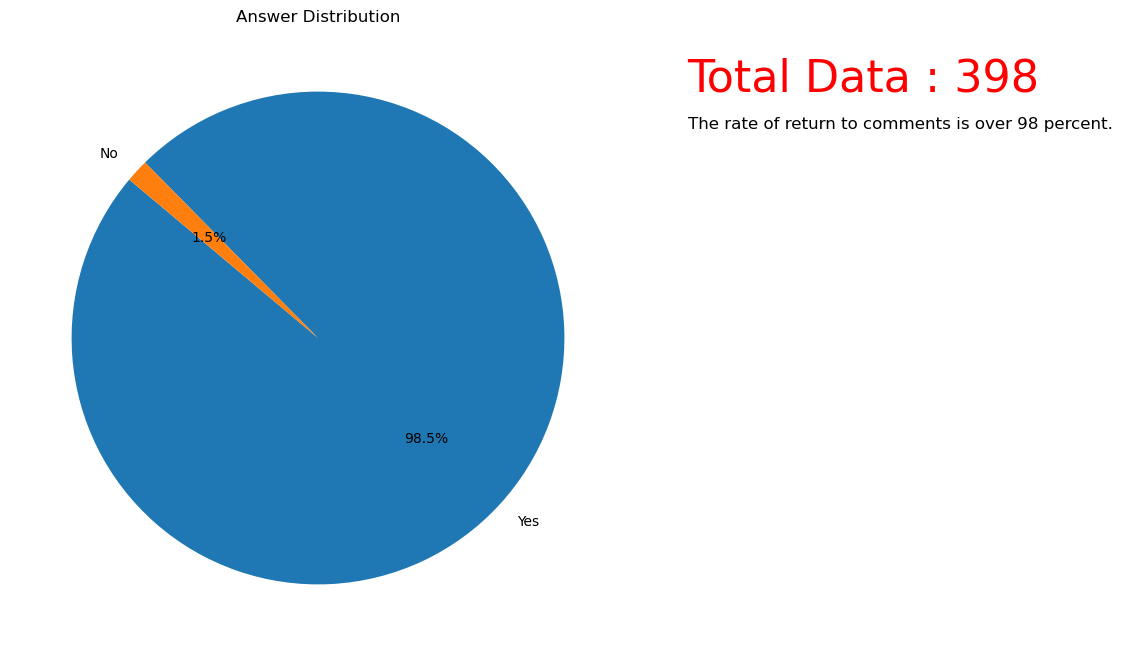

In [211]:
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Answer Distribution')
plt.text(1.5, 1, 'Total Data : 398 ', fontsize=32, color='red')
plt.text(1.5, 0.85, 'The rate of return to comments is over 98 percent.', fontsize=12, color='black')
plt.show()

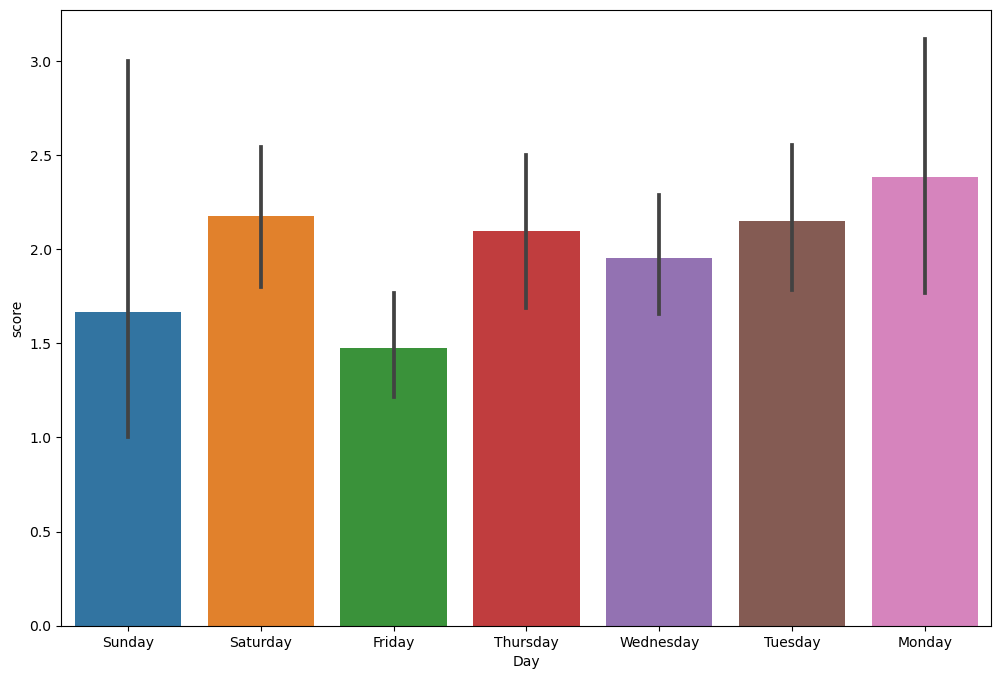

In [212]:
plt.figure(figsize=(12, 8))

sns.barplot(x="Day",y="score",data=df1);

In [207]:
df1.sort_values(by="thumbsUpCount", ascending=False).head(20)


,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,year,month,Day,Hour
181,Rafi Alami,This app was awesome I met so many women that ...,2,122,5.305.1,2024-03-21 11:36:22,We're sorry to hear you haven't heard back fro...,2024-03-23 14:16:23,5.305.1,2024,3,Thursday,11
152,Sc,"None of these apps are great, but this is the ...",1,116,5.362.0,2024-03-21 21:26:05,"This definitely doesn't sound right, and we're...",2024-03-23 14:52:22,5.362.0,2024,3,Thursday,21
208,Jo You Know,I just paid for a subscription & can't use it....,1,72,5.362.0,2024-03-21 01:18:18,Hey Jo! Thanks for letting us know! We're repo...,2024-03-21 22:34:16,5.362.0,2024,3,Thursday,1
286,Steven Fields,"""DO NOT BUY"" . During my time with Bumble. I p...",1,60,5.362.0,2024-03-20 04:53:37,We're sorry to hear you haven't had the best e...,2024-03-20 13:40:43,5.362.0,2024,3,Wednesday,4
81,Vicki K,"After upgrading to premium +, I am unable to v...",1,56,5.362.0,2024-03-23 00:28:31,Thanks for letting us know! We're reporting th...,2024-03-23 14:00:23,5.362.0,2024,3,Saturday,0
290,Melody Kotyk,This app is the worst I have ever used. I have...,1,31,5.362.0,2024-03-20 03:15:04,This doesn’t sound ideal and we'd love to inve...,2024-03-20 13:39:13,5.362.0,2024,3,Wednesday,3
55,nitin Pandey,Let me tell you a short story to expose this s...,1,30,5.362.0,2024-03-23 10:10:52,Thanks for your feedback! You can extend one m...,2024-03-23 13:49:23,5.362.0,2024,3,Saturday,10
224,Evens Jean-Paul,I think this app is for women since I don't se...,1,22,5.362.0,2024-03-20 19:49:41,Thank you for your feedback on this. We're sor...,2024-03-21 10:59:13,5.362.0,2024,3,Wednesday,19
331,Michael Knight,A very large percentage of people on Bumble ar...,1,17,5.362.0,2024-03-19 13:21:45,It's 100% against our Community Guidelines for...,2024-03-19 15:42:12,5.362.0,2024,3,Tuesday,13
276,Stuart Aitken,"""You're out of likes""…. ""You're out of likes""....",1,11,5.358.0,2024-03-20 07:01:32,All of our core features are free to use. You ...,2024-03-20 13:25:13,5.358.0,2024,3,Wednesday,7


In [222]:
df1.to_csv("organised_bumble_statistic.csv")